Biblioteki

In [1]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np
import math
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

Funkcja endurance - poprawiona, zeby przyjmowała tablicę a nie osobne argumenty

In [2]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

def endurance(arr):
    return -(math.exp(-2*(arr[1]-math.sin(arr[0]))**2)+math.sin(arr[2]*arr[3])+math.cos(arr[4]*arr[5]))


Funkcja f(x) - która przebiega po całym roju uruchamiając endurance dla każdej cząstki 

In [3]:
def f(x):
    n_particles = x.shape[0]
    f = np.zeros(n_particles)
    for i in range(n_particles):
        f[i] = endurance(x[i])
    return f

Parametry i optimizer

In [4]:
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

bounds=my_bounds

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)
optimizer.optimize(f, iters=1000)

2023-03-22 11:04:15,609 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.82
2023-03-22 11:04:16,210 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.824596600930893, best pos: [0.55779741 0.56561507 0.99976251 0.9782349  0.25533366 0.25717066]


(-2.824596600930893,
 array([0.55779741, 0.56561507, 0.99976251, 0.9782349 , 0.25533366,
        0.25717066]))

Wykres

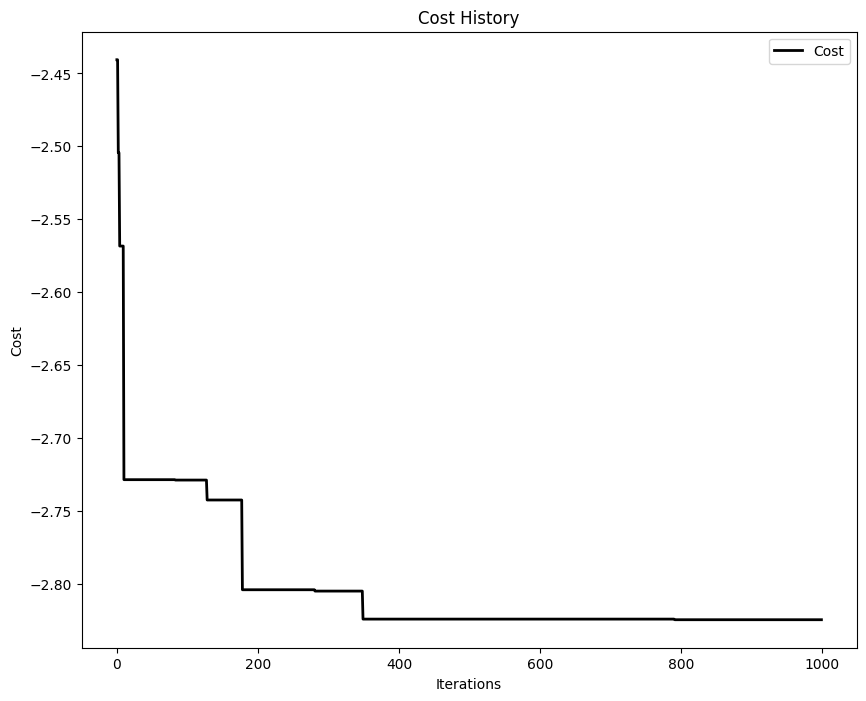

In [5]:
cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()